<a href="https://colab.research.google.com/github/AmruthaAN/Amrutha-ml-project/blob/main/used_device_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Used Device Price Prediction**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/used_device_data.csv')

In [ ]:
df.head()

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [ ]:
df.tail()

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994


In [ ]:
df.shape

(3454, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   rear_camera_mp         3275 non-null   float64
 6   front_camera_mp        3452 non-null   float64
 7   internal_memory        3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [38]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

device_brand               0
os                         0
screen_size                0
4g                         0
5g                         0
rear_camera_mp           179
front_camera_mp            2
internal_memory            4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

### **count plot**



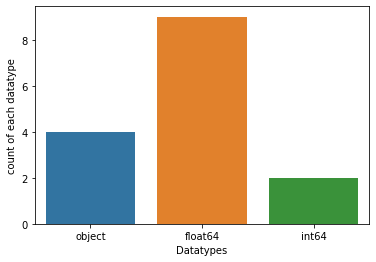

In [ ]:
sns.countplot(df.dtypes,data=df)
plt.xlabel("Datatypes")
plt.ylabel("count of each datatype")
plt.show()

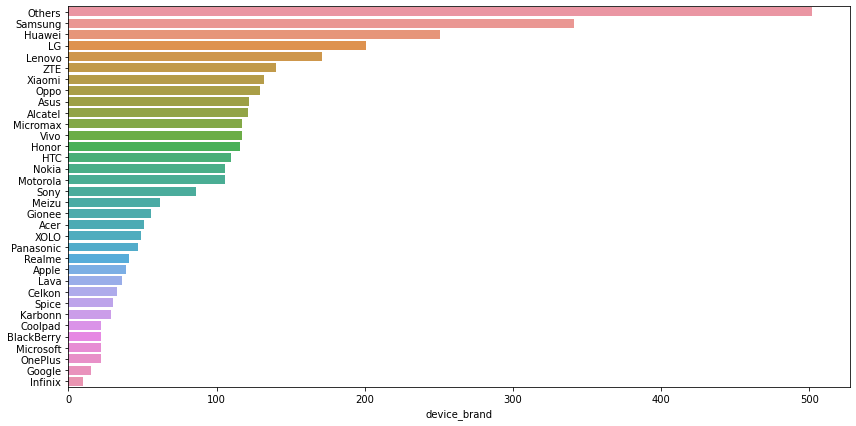

In [37]:
plt.figure(figsize=(14,7))
count=df['device_brand'].value_counts().sort_values(ascending=False)
sns.barplot(y=count.index,x=count)
plt.show()

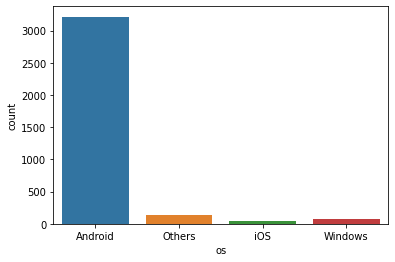

In [ ]:
sns.countplot('os',data=df)
plt.show()

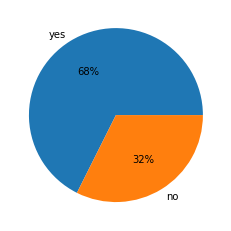

In [ ]:
y=df['4g'].value_counts()
plt.pie(y,labels=y.index,autopct='%0.0f%%')
plt.show()

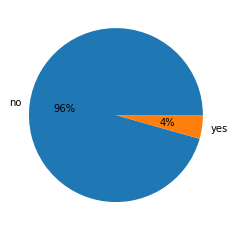

In [ ]:
y=df['5g'].value_counts()
plt.pie(y,labels=y.index,autopct='%0.0f%%')
plt.show()

### **histogram**

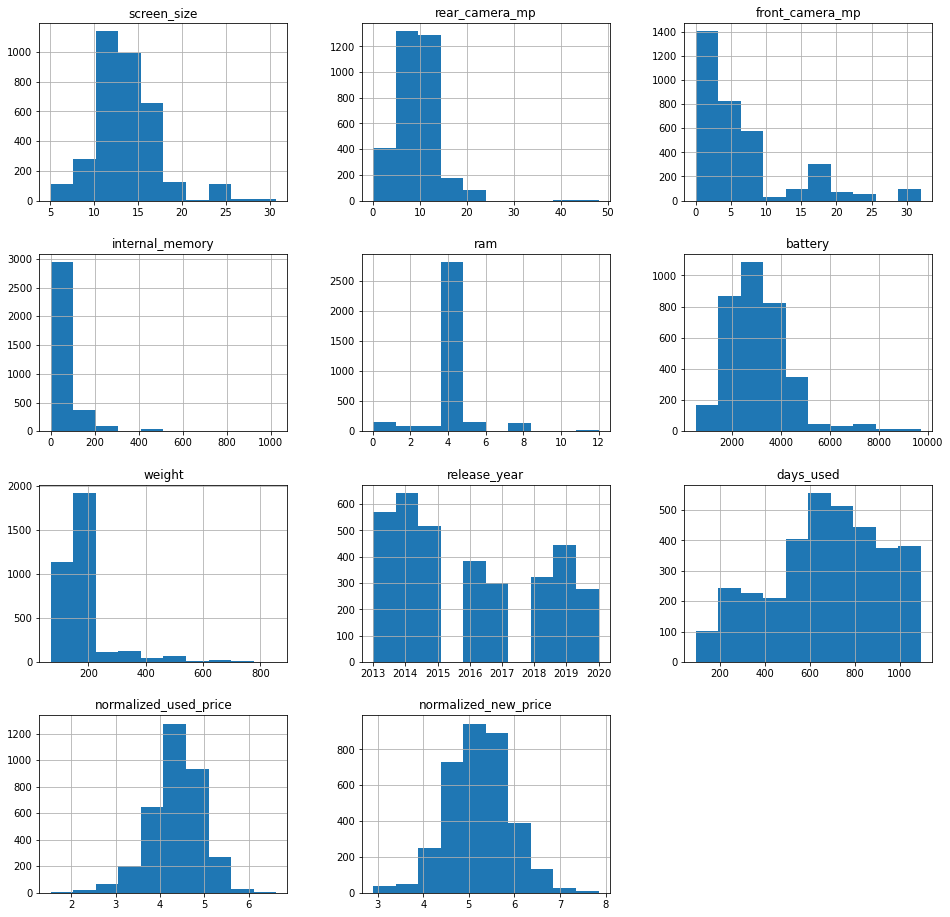

In [ ]:
df.hist(figsize=(16,16))
plt.show()

### **correlation**

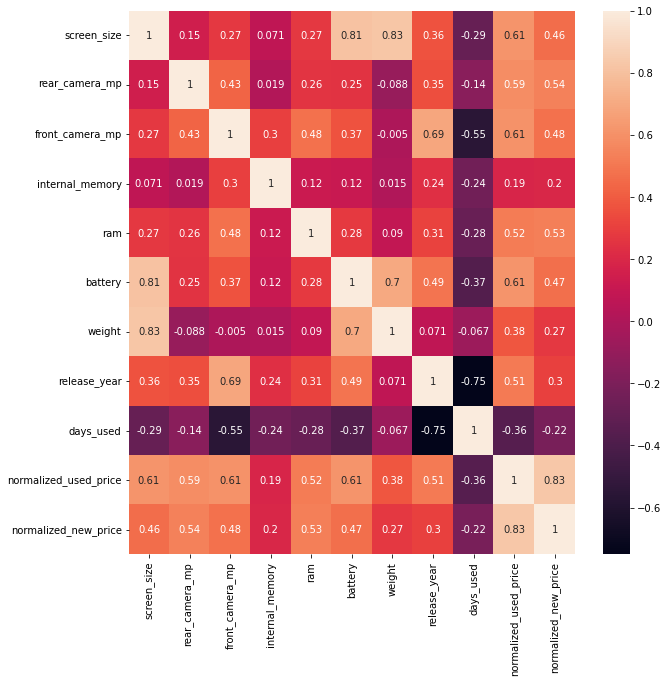

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

### **Regression Plot**

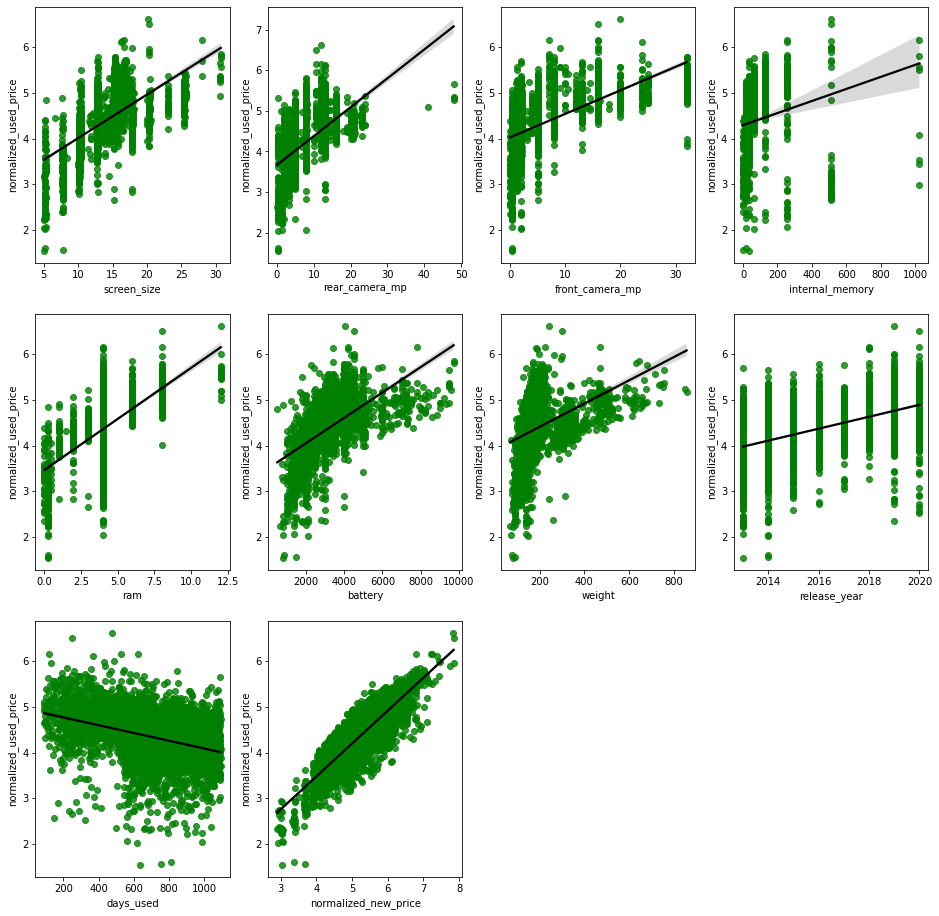

In [ ]:
num_features=[i for i in df.columns if df[i].dtype!='O' and i!='normalized_used_price']
plt.figure(figsize=(16,16))
for i in enumerate(num_features):
  plt.subplot(3,4,i[0]+1)
  sns.regplot(x=i[1],y='normalized_used_price',data=df,color='black',scatter_kws={"color":"green"})

### Data Preprocessing

In [ ]:
dummy=pd.get_dummies(df[['device_brand','os','4g','5g']],drop_first=True)
dummy

,device_brand_Alcatel,device_brand_Apple,device_brand_Asus,device_brand_BlackBerry,device_brand_Celkon,device_brand_Coolpad,device_brand_Gionee,device_brand_Google,device_brand_HTC,device_brand_Honor,...,device_brand_Spice,device_brand_Vivo,device_brand_XOLO,device_brand_Xiaomi,device_brand_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3450,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3451,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3452,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
dfe=pd.concat([df,dummy],axis=1)
dfe

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,...,device_brand_Spice,device_brand_Vivo,device_brand_XOLO,device_brand_Xiaomi,device_brand_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,...,0,0,0,0,0,0,0,0,1,0
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,...,0,0,0,0,0,0,0,0,1,1
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,...,0,0,0,0,0,0,0,0,1,1
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,...,0,0,0,0,0,0,0,0,1,1
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,...,0,0,0,0,0,0,0,0,1,0
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,...,0,0,0,0,0,0,0,0,1,0
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,...,0,0,0,0,0,0,0,0,1,0
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
dfe=dfe.drop(['device_brand','os','4g','5g'],axis=1)
dfe

,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,...,device_brand_Spice,device_brand_Vivo,device_brand_XOLO,device_brand_Xiaomi,device_brand_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,...,0,0,0,0,0,0,0,0,1,0
1,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,...,0,0,0,0,0,0,0,0,1,1
2,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,...,0,0,0,0,0,0,0,0,1,1
3,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,...,0,0,0,0,0,0,0,0,1,1
4,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,15.34,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,...,0,0,0,0,0,0,0,0,1,0
3450,15.24,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,...,0,0,0,0,0,0,0,0,1,0
3451,15.80,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,...,0,0,0,0,0,0,0,0,1,0
3452,15.80,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
features=['rear_camera_mp','front_camera_mp','internal_memory','ram','battery','weight']
for i in features:
  dfe[i]=dfe[i].fillna(dfe[i].median())

In [39]:
dfe.isna().sum()

screen_size                0
rear_camera_mp             0
front_camera_mp            0
internal_memory            0
ram                        0
battery                    0
weight                     0
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
device_brand_Alcatel       0
device_brand_Apple         0
device_brand_Asus          0
device_brand_BlackBerry    0
device_brand_Celkon        0
device_brand_Coolpad       0
device_brand_Gionee        0
device_brand_Google        0
device_brand_HTC           0
device_brand_Honor         0
device_brand_Huawei        0
device_brand_Infinix       0
device_brand_Karbonn       0
device_brand_LG            0
device_brand_Lava          0
device_brand_Lenovo        0
device_brand_Meizu         0
device_brand_Micromax      0
device_brand_Microsoft     0
device_brand_Motorola      0
device_brand_Nokia         0
device_brand_OnePlus       0
device_brand_Oppo          0
device_brand_O

In [ ]:
x=dfe.drop(['normalized_used_price'],axis=1)
x

,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_new_price,...,device_brand_Spice,device_brand_Vivo,device_brand_XOLO,device_brand_Xiaomi,device_brand_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.947837,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,15.34,8.0,8.0,64.0,6.0,5000.0,190.0,2019,232,6.483872,...,0,0,0,0,0,0,0,0,1,0
3450,15.24,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,6.251538,...,0,0,0,0,0,0,0,0,1,0
3451,15.80,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.528829,...,0,0,0,0,0,0,0,0,1,0
3452,15.80,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.624188,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
y=dfe['normalized_used_price']
y

0       4.307572
1       5.162097
2       5.111084
3       5.135387
4       4.389995
          ...   
3449    4.492337
3450    5.037732
3451    4.357350
3452    4.349762
3453    4.132122
Name: normalized_used_price, Length: 3454, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train
x_test
y_train
y_test

511     3.974246
51      5.001191
1171    4.562054
2282    4.176232
557     3.156149
          ...   
1839    4.019980
104     2.386926
2573    4.134847
2741    4.365008
3294    4.944068
Name: normalized_used_price, Length: 1037, dtype: float64

### **Model Creation & Performance Evaluation**

In [ ]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
from sklearn.tree import DecisionTreeRegressor
dt_model=DecisionTreeRegressor()
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor()

from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error,r2_score

model_list=[lr_model,dt_model,rf_model]

In [ ]:
for i in model_list:
  print(i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print("*"*50,'\n')
  print('mean_absolute_percentage_error:',mean_absolute_percentage_error(y_pred,y_test),'\n')
  print('mean_squared_error:',mean_squared_error(y_pred,y_test),'\n')
  print('r2_score:',r2_score(y_pred,y_test),'\n')
  print("*"*50)

LinearRegression()
************************************************** 

mean_absolute_percentage_error: 0.04419922134455647 

mean_squared_error: 0.0567553776318504 

r2_score: 0.7991969645475008 

**************************************************
DecisionTreeRegressor()
************************************************** 

mean_absolute_percentage_error: 0.05714919279575984 

mean_squared_error: 0.09870976226155247 

r2_score: 0.7051352918348328 

**************************************************
RandomForestRegressor()
************************************************** 

mean_absolute_percentage_error: 0.041734631209249834 

mean_squared_error: 0.049605312687841324 

r2_score: 0.82372419721086 

**************************************************
